In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
from mplsoccer import PyPizza, add_image, FontManager
from highlight_text import fig_text
import requests
pd.set_option('display.max_columns', None)

In [145]:
team1 = 'Norwich City'
league1 = 'Championship'
colour1 = 'green'

In [146]:
df = pd.read_excel(f"C:\\Users\\George\\Documents\\Football Analytics\\Data\\{league1.lower()} fotmob.xlsx")

In [147]:
df_team = df[df['name'] == team1]

In [148]:
df

,name,Accurate crosses per match,Accurate long balls per match,Accurate passes per match,Average possession,Big chances,Big chances missed,Clean sheets,Clearances per match,Corners,Expected goals,FotMob rating,Fouls per match,Goals conceded per match,Goals per match,Interceptions per match,Penalties awarded,Penalties conceded,Possession won final 3rd per match,Red cards,Saves per match,Shots on target per match,Successful tackles per match,Touches in opposition box,xG conceded,Yellow cards
0,Huddersfield Town,5.2,21.4,228.7,39.6,1.5,0.9,0.2,21.3,5.0,1.1,0.1,10.8,1.7,1.0,9.4,0.0,0.1,4.3,0.0,2.9,3.7,9.8,19.7,1.4,1.9
1,West Bromwich Albion,5.0,21.1,386.7,52.2,2.0,1.2,0.4,18.3,5.7,1.3,0.1,8.2,1.0,1.5,8.4,0.1,0.2,4.3,0.0,2.3,3.6,7.9,20.8,1.1,1.7
2,Swansea City,5.0,21.5,407.0,55.1,2.0,1.2,0.2,17.1,5.3,1.3,0.1,10.3,1.4,1.3,9.7,0.2,0.1,4.3,0.1,3.1,3.9,9.6,19.8,1.5,2.0
3,Ipswich Town,4.8,23.2,390.8,53.1,2.4,1.4,0.3,16.3,5.3,1.6,0.2,12.3,1.2,2.0,9.0,0.1,0.1,4.4,0.0,2.5,5.7,10.8,27.8,1.0,2.2
4,Leicester City,4.6,24.5,548.9,62.1,3.1,1.8,0.3,15.8,5.5,1.9,0.2,10.3,0.9,1.9,8.9,0.3,0.0,5.0,0.0,2.6,5.2,10.7,29.8,0.9,1.9
5,Norwich City,4.6,23.8,376.8,49.3,2.0,1.0,0.3,21.0,5.3,1.4,0.1,10.0,1.4,1.7,9.3,0.1,0.1,3.7,0.0,2.9,4.4,10.3,21.0,1.4,1.8
6,Southampton,4.3,21.2,597.8,66.0,2.8,1.6,0.3,14.0,7.4,1.8,0.2,9.8,1.4,1.9,8.4,0.1,0.1,4.8,0.1,2.3,5.8,8.8,34.4,1.1,2.2
7,Millwall,4.2,24.5,263.1,41.9,1.4,1.0,0.3,20.3,4.4,1.0,0.1,12.8,1.2,1.0,10.7,0.0,0.2,3.3,0.0,2.5,3.6,11.3,18.6,1.2,2.3
8,Coventry City,4.2,22.1,391.6,51.5,2.1,1.2,0.3,18.4,6.2,1.4,0.1,11.4,1.3,1.5,9.2,0.1,0.1,3.9,0.1,3.2,4.3,10.6,23.4,1.2,2.0
9,Stoke City,4.2,28.0,331.5,50.7,1.8,1.3,0.3,18.0,5.9,1.2,0.1,12.6,1.3,1.1,10.0,0.1,0.1,4.6,0.1,2.7,3.7,11.1,22.7,1.3,2.3


In [149]:
df.columns

Index(['name', 'Accurate crosses per match', 'Accurate long balls per match',
       'Accurate passes per match', 'Average possession', 'Big chances',
       'Big chances missed', 'Clean sheets', 'Clearances per match', 'Corners',
       'Expected goals', 'FotMob rating', 'Fouls per match',
       'Goals conceded per match', 'Goals per match',
       'Interceptions per match', 'Penalties awarded', 'Penalties conceded',
       'Possession won final 3rd per match', 'Red cards', 'Saves per match',
       'Shots on target per match', 'Successful tackles per match',
       'Touches in opposition box', 'xG conceded', 'Yellow cards'],
      dtype='object')

In [150]:
df = df[['name','Accurate passes per match', 'Average possession', 'Big chances',
       'Expected goals', 'Goals conceded per match', 'Goals per match',
       'Possession won final 3rd per match','Shots on target per match',
       'Touches in opposition box', 'xG conceded']]

In [151]:
params = list(df.columns)
params = params[1:]
params

['Accurate passes per match',
 'Average possession',
 'Big chances',
 'Expected goals',
 'Goals conceded per match',
 'Goals per match',
 'Possession won final 3rd per match',
 'Shots on target per match',
 'Touches in opposition box',
 'xG conceded']

In [152]:
team_values = df.loc[df['name'] == team1].reset_index()

In [153]:
team_values

,index,name,Accurate passes per match,Average possession,Big chances,Expected goals,Goals conceded per match,Goals per match,Possession won final 3rd per match,Shots on target per match,Touches in opposition box,xG conceded
0,5,Norwich City,376.8,49.3,2.0,1.4,1.4,1.7,3.7,4.4,21.0,1.4


In [154]:
team_values = list(team_values.loc[0])

In [155]:
team_values = team_values[2:]

In [156]:
average_values = []
for x in range(len(params)):
    average_values.append(df[params[x]].mean().astype(float).round(1))
min_values = []
for x in range(len(params)):
    min_values.append(df[params[x]].min())
max_values = []
for x in range(len(params)):
    max_values.append(df[params[x]].max())

In [157]:
min_values[4] = max_values[4]
max_values[4] = 1.1
min_values[9] = max_values[9]
max_values[9] = 1.1

In [158]:
for x in params:
    if 'per match' in x:
        params[params.index(x)] = x.replace('per match', '')

In [159]:
font_normal = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/'
                          'src/hinted/Roboto-Regular.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/'
                          'src/hinted/Roboto-Italic.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab[wght].ttf')

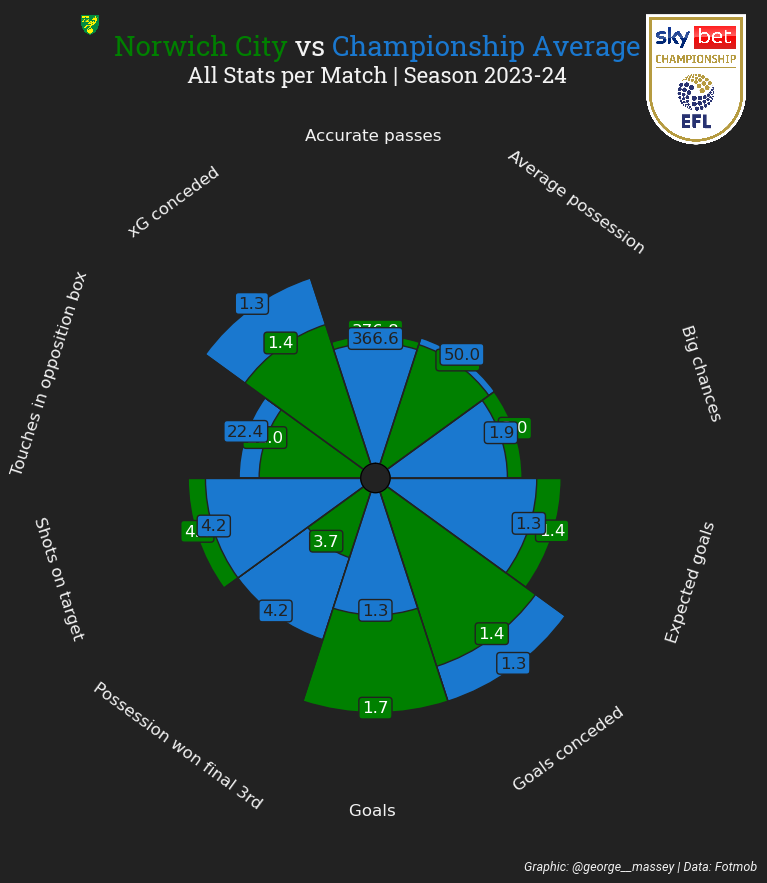

In [161]:
# parameter and value list
# The values are taken from the excellent fbref website (supplied by StatsBomb)

bg_color = '#222222'

values = team_values    # Putellas
values_2 = average_values  # League Average

# minimum range value and maximum range value for parameters
min_range = min_values
max_range = max_values

# instantiate PyPizza class
baker = PyPizza(
    params=params,
    min_range=min_range,        # min range values
    max_range=max_range,        # max range values
    background_color=bg_color, straight_line_color=bg_color,
    last_circle_color=bg_color, last_circle_lw=2.5, other_circle_lw=0,
    other_circle_color=bg_color, straight_line_lw=1
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                     # list of values
    compare_values=values_2,    # passing comparison values
    figsize=(8, 8),             # adjust figsize according to your need
    #color_blank_space="black",   # use same color to fill blank space
    blank_alpha=0.2,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor=colour1, edgecolor=bg_color,
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_compare=dict(
        facecolor='#1A78CF', edgecolor=bg_color, zorder=3, linewidth=1,
    ),                          # values to be used when plotting comparison slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=12, zorder=5,
        #fontproperties=font_normal.prop, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color='white', fontsize=12,
        #fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor=bg_color, facecolor=colour1,
            boxstyle="round,pad=0.2", lw=1
        )
    ),                           # values to be used when adding parameter-values
    kwargs_compare_values=dict(
        color=bg_color, fontsize=12,
        #fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor=bg_color, facecolor='#1A78CF',
            boxstyle="round,pad=0.2", lw=1
        )
    )                            # values to be used when adding comparison-values
)

# add title
fig_text(
    0.515, 1.05, f"<{team1}> vs <{league1} Average>",
    size=20, fig=fig,
    highlight_textprops=[{"color": colour1}, {"color": '#1A78CF'}],
    ha="center", color="#F2F2F2",
    fontproperties=font_bold.prop
)

# add subtitle
fig.text(
    0.515, 0.99,
    "All Stats per Match | Season 2023-24",
    size=16,
    ha="center", color="#F2F2F2",
    fontproperties=font_bold.prop
)

# add credits
CREDIT_1 = "Graphic: @george__massey | Data: Fotmob"

fig.text(
    0.99, 0.005, f"{CREDIT_1}", size=9,
    color="#F2F2F2",
    ha="right", fontproperties=font_italic.prop
)
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib as mpl
logo_image = plt.imread(f"C:\\Users\\George\\Documents\\Football Analytics\\Team Logos\\{team1.lower()}_logo.png")

# Create an OffsetImage instance with the loaded image
logo_offsetimage = OffsetImage(logo_image, zoom=0.05)  # Adjust the zoom value as needed

# Create an AnnotationBbox instance and add it to the plot
logo_box = AnnotationBbox(logo_offsetimage, (0.05, 1.25), xycoords='axes fraction', box_alignment=(1.0, 1.0), boxcoords="offset pixels")
ax = plt.gca()
ax.add_artist(logo_box)
logo_box.patch.set_alpha(0)
logo_image2 = plt.imread(f"C:\\Users\\George\\Documents\\Football Analytics\\Images\\{league1.lower()}_logo.png")

# Create an OffsetImage instance with the loaded image
logo_offsetimage2 = OffsetImage(logo_image2, zoom=0.06)  # Adjust the zoom value as needed

# Create an AnnotationBbox instance and add it to the plot
logo_box2 = AnnotationBbox(logo_offsetimage2, (1.1, 1.25), xycoords='axes fraction', box_alignment=(1.0, 1.0), boxcoords="offset pixels")
ax = plt.gca()
ax.add_artist(logo_box2)
logo_box2.patch.set_alpha(0)
plt.show()

In [ ]:
fig.savefig(
    f"C:/Users/George/Documents/Football Analytics/Visuals/{team1} Pizza Plot Comparison.png",
    facecolor=ax.get_facecolor(),
    dpi=200,
    bbox_inches="tight"
)